In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read files and see contents
games = pd.read_csv('../input/videogamesales/vgsales.csv')
games.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<AxesSubplot:title={'center':'Total Sales Per Region'}, xlabel='Sales', ylabel='Sales in Millions'>

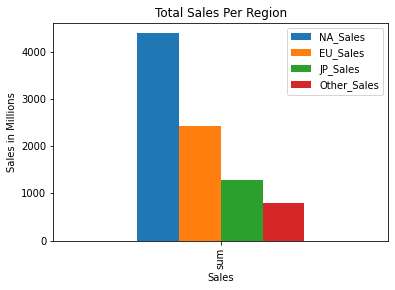

In [3]:
#Find out how many total sales there are in each region

#Aggregate sum of each region
games_agg = games.agg({'NA_Sales':['sum'], 'EU_Sales':['sum'], 'JP_Sales':['sum'], 'Other_Sales':['sum']})

#Create the graph
games_agg.plot(kind='bar', title ='Total Sales Per Region', ylabel='Sales in Millions',
              xlabel='Sales')

Text(0, 0.5, 'Sales in Millions')

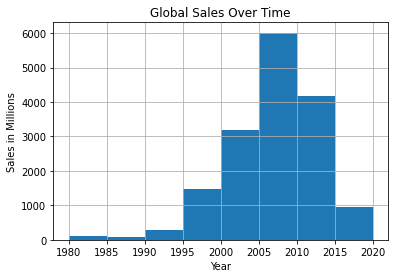

In [4]:
#Total Global Sales Per 5 Year

games.hist(column=['Year'],bins=8)
plt.title("Global Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Sales in Millions")

<AxesSubplot:title={'center':'Trend of Sales in Each Region Over Time'}, xlabel='Year', ylabel='Sales in Millions'>

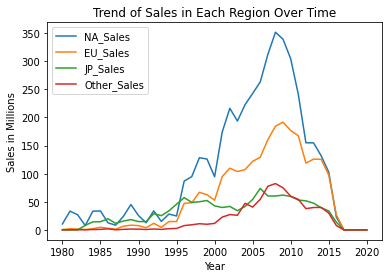

In [5]:
#Trend of sales in different regions over time

#Sum up each years sales per region
games_region_ot = games.groupby(['Year']).sum(['NA_Sales'])
games_region_ot2 = games_region_ot.drop(columns=['Rank','Global_Sales'])

#Create the graph
games_region_ot2.plot(kind='line', title='Trend of Sales in Each Region Over Time',
                     ylabel = 'Sales in Millions')

<AxesSubplot:title={'center':'Total Global Sales by Publisher'}, xlabel='Publisher', ylabel='Sales in Millions'>

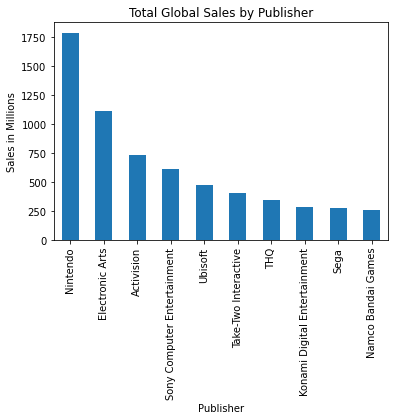

In [6]:
#Find out which company has the most sales

#Sum of sales by publisher
games_publisher = games.groupby('Publisher')['Global_Sales'].sum()
games_publisher_top = games_publisher.nlargest(10)

#Create the graph
games_publisher_top.plot(kind='bar', title='Total Global Sales by Publisher',
                        ylabel='Sales in Millions', xlabel='Publisher')

In [7]:
#What are the most popular games from ten publishers

games_top = games.loc[games.groupby(['Publisher'], sort=False)['Global_Sales'].idxmax()][['Publisher','Name','Global_Sales']]
games_top.nlargest(10, ['Global_Sales'])

,Publisher,Name,Global_Sales
0,Nintendo,Wii Sports,82.74
15,Microsoft Game Studios,Kinect Adventures!,21.82
16,Take-Two Interactive,Grand Theft Auto V,21.40
28,Sony Computer Entertainment,Gran Turismo 3: A-Spec,14.98
29,Activision,Call of Duty: Modern Warfare 3,14.76
60,Ubisoft,Just Dance 3,10.26
75,Bethesda Softworks,The Elder Scrolls V: Skyrim,8.84
77,Electronic Arts,FIFA 16,8.49
85,Sega,Mario & Sonic at the Olympic Games,8.06
87,SquareSoft,Final Fantasy VIII,7.86
